In [ ]:
import pandas as pd
import string
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud
import nltk
import nltk.data
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
nltk.download('vader_lexicon')
nltk.download('punkt')
import warnings
warnings.filterwarnings("ignore")

<ipython-input-1-c842be1aee95>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
ag = pd.read_csv("ArianaGrande.csv")
by = pd.read_csv("Beyonce.csv")
be = pd.read_csv("BillieEilish.csv")
cb = pd.read_csv("CardiB.csv")
cd = pd.read_csv("ColdPlay.csv")
cp = pd.read_csv("CharliePuth.csv")
dr = pd.read_csv("Drake.csv")
dp = pd.read_csv("DuaLipa.csv")
es = pd.read_csv("EdSheeran.csv")
em = pd.read_csv("Eminem.csv")
jb = pd.read_csv("JustinBieber.csv")
kp = pd.read_csv("KatyPerry.csv")
kh = pd.read_csv("Khalid.csv")
lg = pd.read_csv("LadyGaga.csv")
m5 = pd.read_csv("Maroon5.csv")
nm = pd.read_csv("NickiMinaj.csv")
pm = pd.read_csv("PostMalone.csv")
rh = pd.read_csv("Rihanna.csv")
sg = pd.read_csv("SelenaGomez.csv")
ts = pd.read_csv("TaylorSwift.csv")

In [ ]:
df_all = [ag,by,be,cb,cd,cp,dr,dp,es,em,jb,kp,kh,lg,m5,nm,pm,rh,sg,ts]

In [ ]:
df_all

[            Artist                                       Title  \
 0    Ariana Grande                              ​thank u, next   
 1    Ariana Grande                                     7 rings   
 2    Ariana Grande                             ​God is a woman   
 3    Ariana Grande                                Side To Side   
 4    Ariana Grande                      ​​no tears left to cry   
 ..             ...                                         ...   
 303  Ariana Grande  God is a Woman (Excuse me i love you LIVE)   
 304  Ariana Grande                                      Magic*   
 305  Ariana Grande                                  Right here   
 306  Ariana Grande                                     Venuss*   
 307  Ariana Grande          One last time_Ariana_Grande_(2014)   
 
                Album        Date  \
 0      thank u, next  2018-11-03   
 1      thank u, next  2019-01-18   
 2          Sweetener  2018-07-13   
 3    Dangerous Woman  2016-05-20   
 4       

In [ ]:
def lyrics_to_words(document):
    stop_words = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()
    stopwordremoval = " ".join([i for i in document.lower().split() if i not in stop_words])
    punctuationremoval = ''.join(ch for ch in stopwordremoval if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punctuationremoval.split())
    return normalized

In [ ]:
def toword(df):
    def unique(list1):
       # intilize a null list
         unique_list = []
       # traverse for all elements
         for x in list1:
             # check if exists in unique_list or not
             if x not in unique_list:
                  unique_list.append(x)
         return unique_list

    #Stores unique words of each lyrics song into a new column called words
    #list used to store the words
    words = []
    #iterate trought each lyric and split unique words appending the result into the words list
    df = df.reset_index(drop=True)
    for word in df['Lyric'].tolist():
        words.append(unique(lyrics_to_words(word).split()))
    #create the new column with the information of words lists
    df['words'] = words
    return df

In [ ]:
def cleaning(df):
    a=[]
    i=0
    df1=df
    title = df['Title']
    for t in df['Title']:
        r=Re=l=Li=c=m=V=ve=D=rs=0
        r=t.find('remix')
        Re=t.find('Remix')
        l=t.find('live')
        Li=t.find('Live')
        V=t.find('Version')
        ve=t.find('version')
        D=t.find('Demo ')
        D=t.find('Demo')
        rs=t.find('Reprise')
        c=t.find('COPY')
        m=t.find('Mix')
        if r != -1:
            a.append(t)
        elif Re != -1:
            a.append(t)
        elif l != -1:
            a.append(t)
        elif Li != -1:
            a.append(t)
        elif V != -1:
            a.append(t)
        elif ve != -1:
            a.append(t)
        elif D != -1:
            a.append(t)
        elif rs != -1:
            a.append(t)
        elif c != -1:
            a.append(t)
        elif m != -1:
            a.append(t)

    for t1 in df['Title']:
        for t2 in a:
            if t1 == t2:
                df1=df1.drop(i)
        i=i+1

    df1.dropna(subset = ["Title"], inplace=True)
    df1.dropna(subset = ["Lyric"], inplace=True)
    df1.drop_duplicates(subset ="Title",keep = False, inplace = True)
    df1.drop_duplicates(subset ="Lyric",keep = False, inplace = True)


    return df1

In [ ]:
def countword(df):
    c=[]
    for word in df['words']:
        for w in word:
            c.append(w)
    return c

In [ ]:
def words_stats(df,main_df):
    unique_words = []
    total_words = []
    total_news = []
    name = []

    for value in df.columns[1:]:
        unique_words.append(np.count_nonzero(df[value]))
        total_words.append(sum(df[value]))
        name.append(str(value))
        total_news.append(main_df['name'][main_df['name']==value].count())
        data = pd.DataFrame({'name':name,
                          'unique words':unique_words,
                          'total words':total_words,
                          'total songs':total_news})
    data['words per songs'] = round(data['total words'] / data['total songs'],0)
    data['words per songs'] = data['words per songs'].astype('int')
    return data

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df_allc=[]
for df in df_all:
    df_c=cleaning(df)
    df_w=toword(df_c)
    df_allc.append(df_w)

frames=df_allc
df_main = pd.concat(frames,ignore_index=True)
df_main['Year'] = pd.to_numeric(df_main['Year'], errors='coerce')
df_main['Year'] = df_main['Year'].fillna(0).astype(int)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df_main= df_main.drop(df_main[(df_main['Year'] < 1000) | (df_main['Year'] > 2021)].index)
df_main= df_main.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,errors='ignore')
df_main=df_main.reset_index(drop=True)

In [ ]:
before=[]
after=[]
length=[]
ulength=[]
wd=[]

for df in df_all:
    a,b=df.shape
    before.append(a)

for dfc in df_allc:
    a,b=dfc.shape
    after.append(a)
    c=countword(dfc)
    l=len(c)
    ul=len(np.unique(c))
    wd.append(c)
    length.append(l)
    ulength.append(ul)

In [ ]:
artists=['ArianaGrande','Beyonce','BillieEilish','CardiB','CharliePuth','ColdPlay','Drake','DuaLipa','EdSheeran','Eminem','JustinBieber','KatyPerry','Khalid','LadyGaga','Maroon5','NickiMinaj','PostMalone','Rihanna','SelenaGomez','TaylorSwift']
df_info =pd.DataFrame({'name':artists,'before':before,'after':after,'words':wd,'unique words':ulength,'word count':length})
df_info['diff']=df_info['before']-df_info['after']
df_info['words per songs'] = round(df_info['word count'] / df_info['after'],0)
df_info['words per songs'] = df_info['words per songs'].astype('int')
df_info['lexicalrichness']=(df_info['unique words']/df_info['word count'])*100
df_info=df_info[['name','before','after','diff','words','words per songs','unique words','word count','lexicalrichness']]
df_info

,name,before,after,diff,words,words per songs,unique words,word count,lexicalrichness
0,ArianaGrande,308,202,106,"[thought, id, end, sean, match, wrote, song, r...",65,3394,13193,25.725764
1,Beyonce,406,224,182,"[beyoncé, ive, drinkin, get, filthy, liquor, t...",85,4980,19041,26.154089
2,BillieEilish,145,73,72,"[know, im, good, ive, learned, lose, cant, aff...",51,1519,3720,40.833333
3,CardiB,75,69,6,"[cardi, b, al, mclaran, megan, thee, stallion,...",112,2507,7710,32.516213
4,CharliePuth,344,225,119,"[come, meet, tell, im, sorry, know, lovely, fi...",46,2692,10271,26.209717
5,ColdPlay,75,65,10,"[woahoh, hmhmm, runnin, round, throwin, dirt, ...",61,1297,3953,32.810524
6,Drake,466,420,46,"[wishin, yeah, movin, calm, start, trouble, tr...",141,9770,59082,16.536339
7,DuaLipa,247,111,136,"[one, talkin, sleep, night, makin, crazy, mind...",66,2113,7292,28.976961
8,EdSheeran,296,202,94,"[club, best, place, find, lover, bar, go, frie...",92,4490,18650,24.075067
9,Eminem,521,470,51,"[look, gonna, go, easy, hurt, feeling, im, goi...",223,18784,104805,17.922809


In [ ]:
all_words=[]
for index, row in df_info.iterrows():
    name, words = row['name'], row['words']
    for word in words:
        all_words.append(word)

In [ ]:
from collections import Counter
word_counts = Counter(all_words)

In [ ]:
word_counts_df = pd.DataFrame(list(word_counts.items()), columns=['Word', 'Frequency'])

In [ ]:
print(f"Length of 'after': {len(after)}")
print(f"Length of 'before': {len(before)}")
print(f"Length of 'artists': {len(artists)}")
print(f"Length of 'wd': {len(wd)}")
print(f"Length of 'ulength': {len(ulength)}")
print(f"Length of 'length': {len(length)}")

Length of 'after': 20
Length of 'before': 20
Length of 'artists': 20
Length of 'wd': 20
Length of 'ulength': 20
Length of 'length': 20


In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Unique Word Count', x=df_info['name'], y=df_info['unique words'].tolist()),
    go.Bar(name='Total Word Count', x=df_info['name'], y=df_info['word count'].tolist()),

])
# Change the bar mode
fig.update_layout(barmode='group',title={'text': "Total words vs Unique words",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

In [ ]:
print(df_info[df_info.lexicalrichness == max(df_info['lexicalrichness'])].loc[:,'name'])
print(max(df_info['lexicalrichness']))
fig = px.bar(df_info, x='name',y='lexicalrichness')
fig.update_layout(title={'text': "Lexicalrichness of all artist",'y':1,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

2    BillieEilish
Name: name, dtype: object
40.833333333333336


In [ ]:
df_group=df_main.groupby(['Artist','Year']).count().iloc[:,0:2]
#df_group=df_group.drop("Unnamed: 0",axis=1)
df_group =df_group.reset_index()
df_group

,Artist,Year,Title,Album
0,Ariana Grande,2008,3,3
1,Ariana Grande,2009,2,1
2,Ariana Grande,2010,4,2
3,Ariana Grande,2011,6,1
4,Ariana Grande,2012,4,2
...,...,...,...,...
277,Taylor Swift,2017,22,19
278,Taylor Swift,2018,9,8
279,Taylor Swift,2019,30,21
280,Taylor Swift,2020,57,50


In [ ]:
df_temp= df_group.drop('Artist',axis=1)
df_temp=df_temp.groupby(['Year']).count()
df_temp=df_temp.reset_index()
fig = px.line(df_temp, x='Year',y='Title')
fig.update_layout(title={'text': "No. of Titles by all artist from 2001-2021",'y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

In [ ]:
df_main['Artist'].unique()

array(['Ariana Grande', 'Beyoncé', 'Billie Eilish', 'Cardi B', 'Coldplay',
       'Charlie Puth', 'Drake', 'Dua Lipa', 'Ed Sheeran', 'Eminem',
       'Justin Bieber', 'Katy Perry', 'Khalid', 'Lady Gaga', 'Maroon 5',
       'Nicki Minaj', 'Post Malone', 'Rihanna', 'Selena Gomez',
       'Taylor Swift'], dtype=object)

Text(0.5, 1.0, 'Beyoncé')

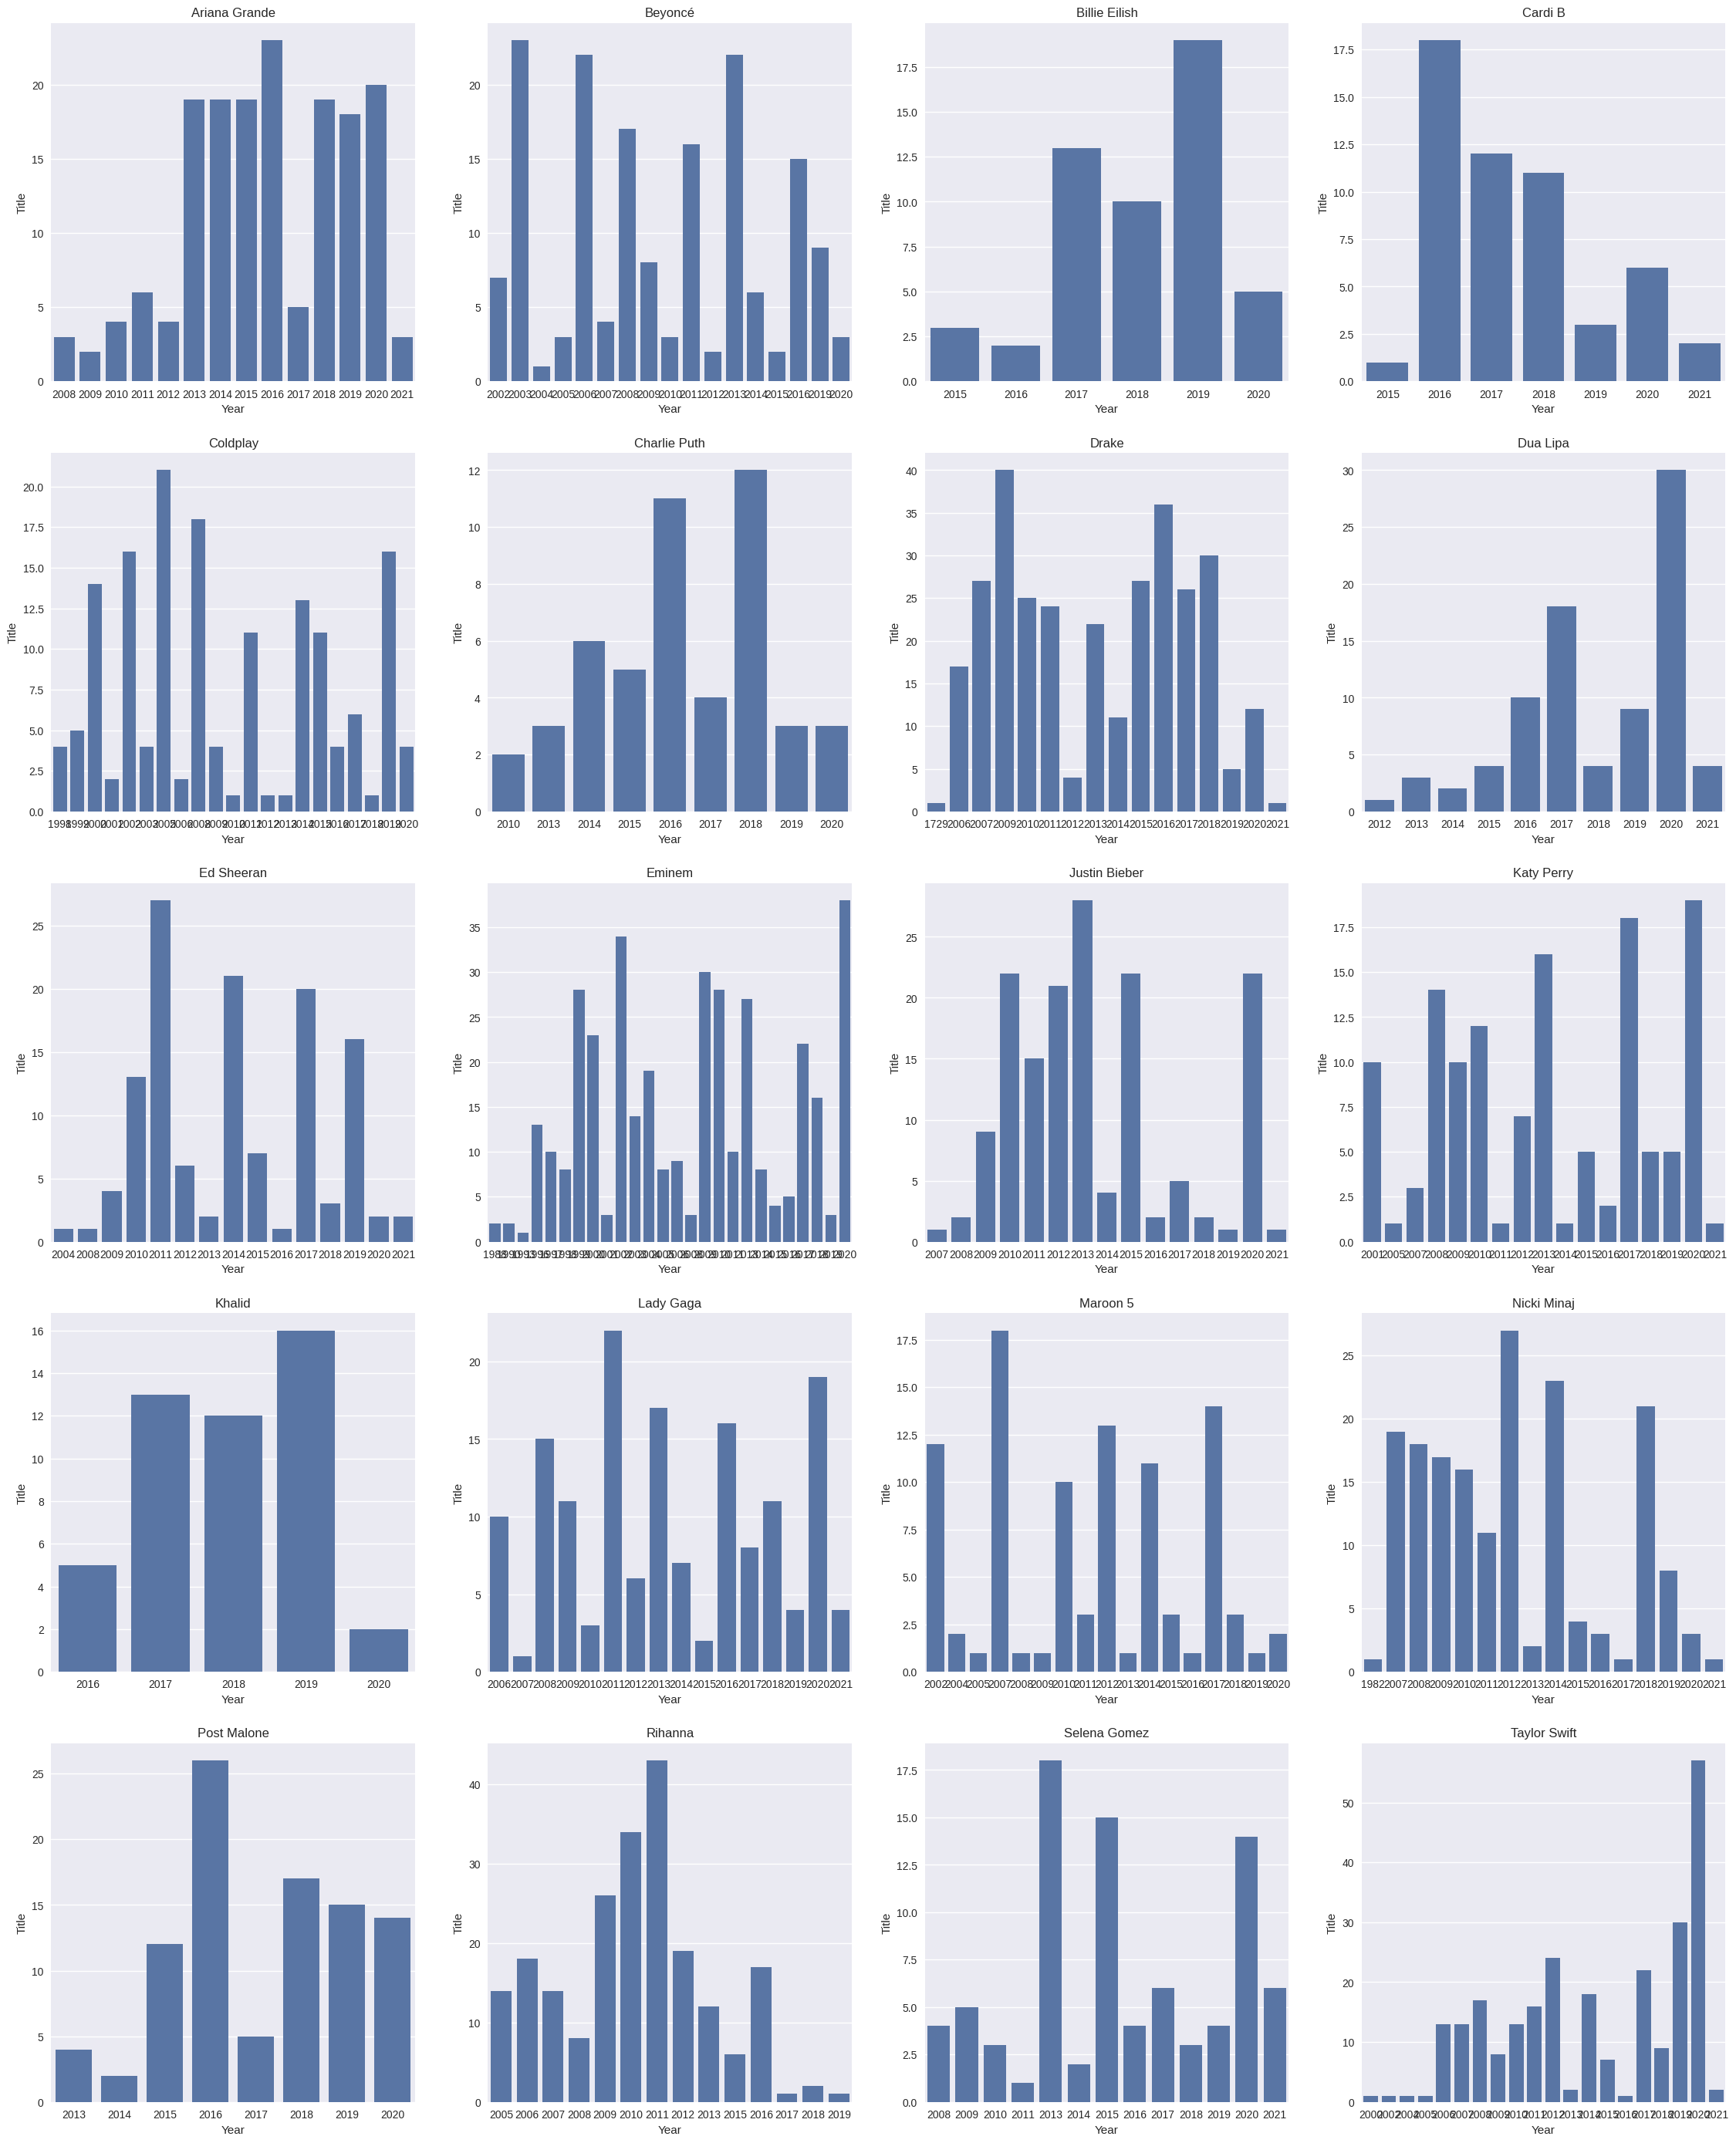

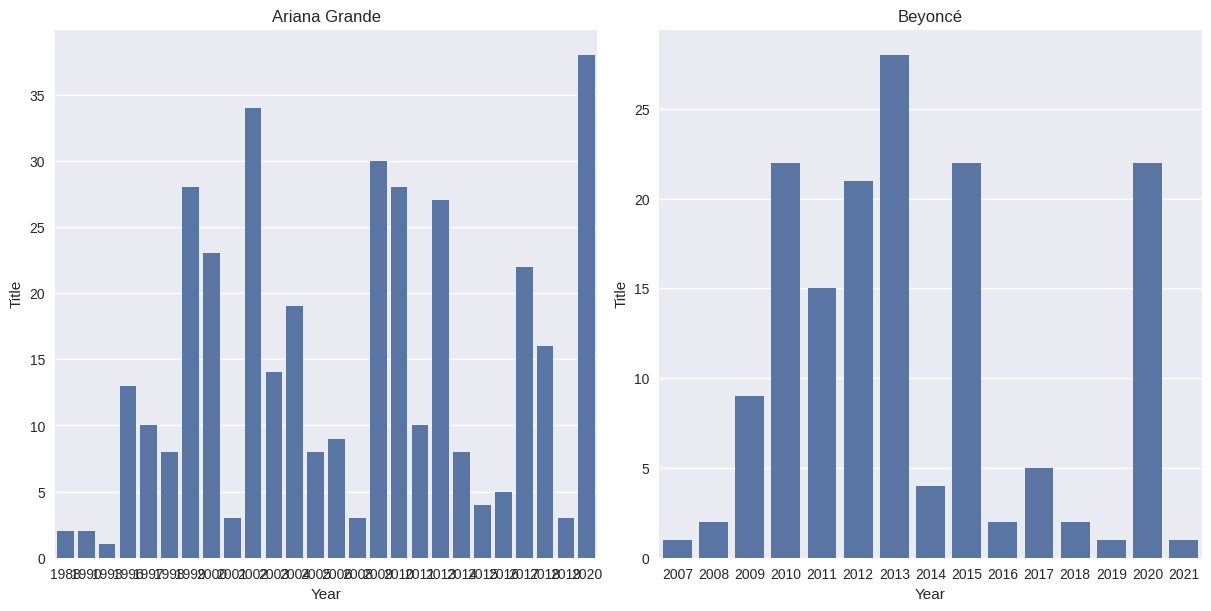

In [ ]:
df_temp=[]
name=df_main['Artist'].unique()
name=name[0:20]
num_plots = 20
total_cols = 4
total_rows = 5
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows))
for artist in df_main['Artist'].unique():
    df_temp.append(df_group[df_group['Artist']==artist])
for i, var in enumerate(name):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.barplot(data=df_temp[i],x="Year", y="Title",ax=axs[row][pos])
    axs[row][pos].set_title(name[i])


name=df_main['Artist'].unique()
fig, axs = plt.subplots(nrows=1, ncols=2,
                        figsize=(12, 6), constrained_layout=True)
plot = sns.barplot(data=df_temp[9],x="Year", y="Title",ax=axs[0])
axs[0].set_title(name[0])
plot = sns.barplot(data=df_temp[10],x="Year", y="Title",ax=axs[1])
axs[1].set_title(name[1])

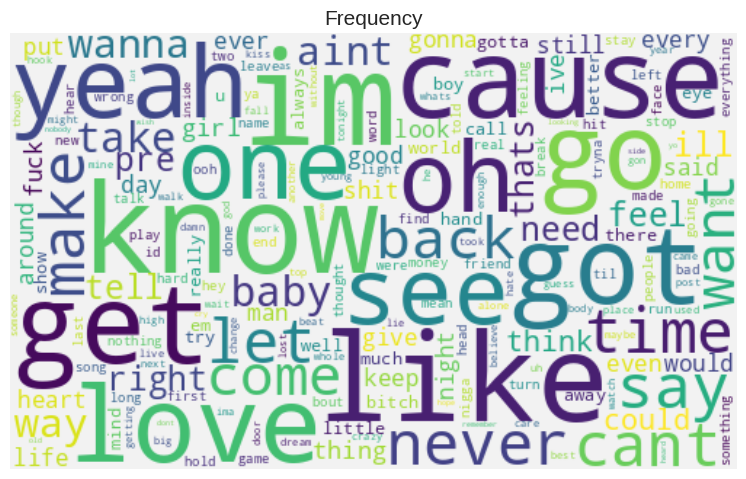

In [ ]:
def plot_wordcloud(df, row, col):
    wc = WordCloud(background_color="#F2F2F2", max_font_size=90, random_state=42,
                   width=500, height=300)

    fig = plt.figure(figsize=(30, 25))

    for index, value in enumerate(df.columns[1:]):
        top_dict = dict(zip(df['Word'].tolist(), df[value].tolist()))
        wc.generate_from_frequencies(top_dict)
        plt.subplot(row, col, index + 1)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{value}", fontsize=15)

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

plot_wordcloud(word_counts_df,4,3)

In [ ]:
df

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Taylor Swift,​cardigan,folklore,2020.0,2020-07-24,vintage tee brand new phone high heels on cobb...
1,1,Taylor Swift,​exile,folklore,2020.0,2020-07-24,justin vernon i can see you standing honey wit...
2,2,Taylor Swift,Lover,Lover,2019.0,2019-08-16,we could leave the christmas lights up 'til ja...
3,3,Taylor Swift,​the 1,folklore,2020.0,2020-07-24,i'm doing good i'm on some new shit been sayin...
4,4,Taylor Swift,Look What You Made Me Do,reputation,2017.0,2017-08-25,i don't like your little games don't like your...
...,...,...,...,...,...,...,...
474,474,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,Live From Clear Channel Stripped 2008,2008.0,2008-06-28,drew looks at me i fake a smile so he won't se...
475,475,Taylor Swift,Evermore [Forward],NaN,2020.0,2020-12-11,to put it plainly we just couldnt stop writing...
476,476,Taylor Swift,Welcome Back Grunwald,NaN,NaN,NaN,turn wycd on you're on your grunwald back from...
477,477,Taylor Swift,Tolerate it (Polskie Tłumaczenie),NaN,2020.0,2020-12-11,zwrotka siedzę i patrzę jak czytasz z głową p...


In [ ]:
def setimentanalyzer(df):
    neg='Negative'
    neu='Neutral'
    pos='Positive'
    negative = []
    neutral = []
    positive = []
    dominant_sentiment=[]
    dominant_sentiment_score=[]
    #Initialize the model
    sid = SentimentIntensityAnalyzer()
    #Iterate for each row of lyrics and append the scores
    for i in df.index:

        scores = sid.polarity_scores(df['Lyric'].iloc[i])
        negative.append(scores['neg'])
        neutral.append(scores['neu'])
        positive.append(scores['pos'])
        if scores['neg']>scores['pos']:
            dominant_sentiment_score.append(scores['neg'])
            dominant_sentiment.append(neg)
        elif scores['neg']<scores['pos']:
            dominant_sentiment_score.append(scores['pos'])
            dominant_sentiment.append(pos)
        else:
            dominant_sentiment_score.append(scores['neu'])
            dominant_sentiment.append(neu)
    #Create 5 columns to the main data frame  for each score
    df['negative'] = negative
    df['neutral'] = neutral
    df['positive'] = positive
    df['dominant_sentiment']=dominant_sentiment
    df['dominant_sentiment_score']=dominant_sentiment_score
    return df

In [ ]:
df_sentiment=setimentanalyzer(df_main)
df_sentiment.head(5)

,Artist,Title,Album,Date,Lyric,Year,words,negative,neutral,positive,dominant_sentiment,dominant_sentiment_score
0,Ariana Grande,"​thank u, next","thank u, next",2018-11-03,thought i'd end up with sean but he wasn't a m...,2018,"[thought, id, end, sean, match, wrote, song, r...",0.062,0.503,0.435,Positive,0.435
1,Ariana Grande,7 rings,"thank u, next",2019-01-18,yeah breakfast at tiffany's and bottles of bub...,2019,"[yeah, breakfast, tiffany, bottle, bubble, gir...",0.070,0.650,0.280,Positive,0.280
2,Ariana Grande,​God is a woman,Sweetener,2018-07-13,you you love it how i move you you love it how...,2018,"[love, move, touch, one, said, done, believe, ...",0.000,0.733,0.267,Positive,0.267
3,Ariana Grande,Side To Side,Dangerous Woman,2016-05-20,ariana grande nicki minaj i've been here all ...,2016,"[ariana, grande, nicki, minaj, ive, night, day...",0.062,0.865,0.073,Positive,0.073
4,Ariana Grande,​​no tears left to cry,Sweetener,2018-04-20,right now i'm in a state of mind i wanna be in...,2018,"[right, im, state, mind, wanna, like, time, ai...",0.079,0.716,0.204,Positive,0.204


Text(0.5, 1.0, 'Justin Bieber')

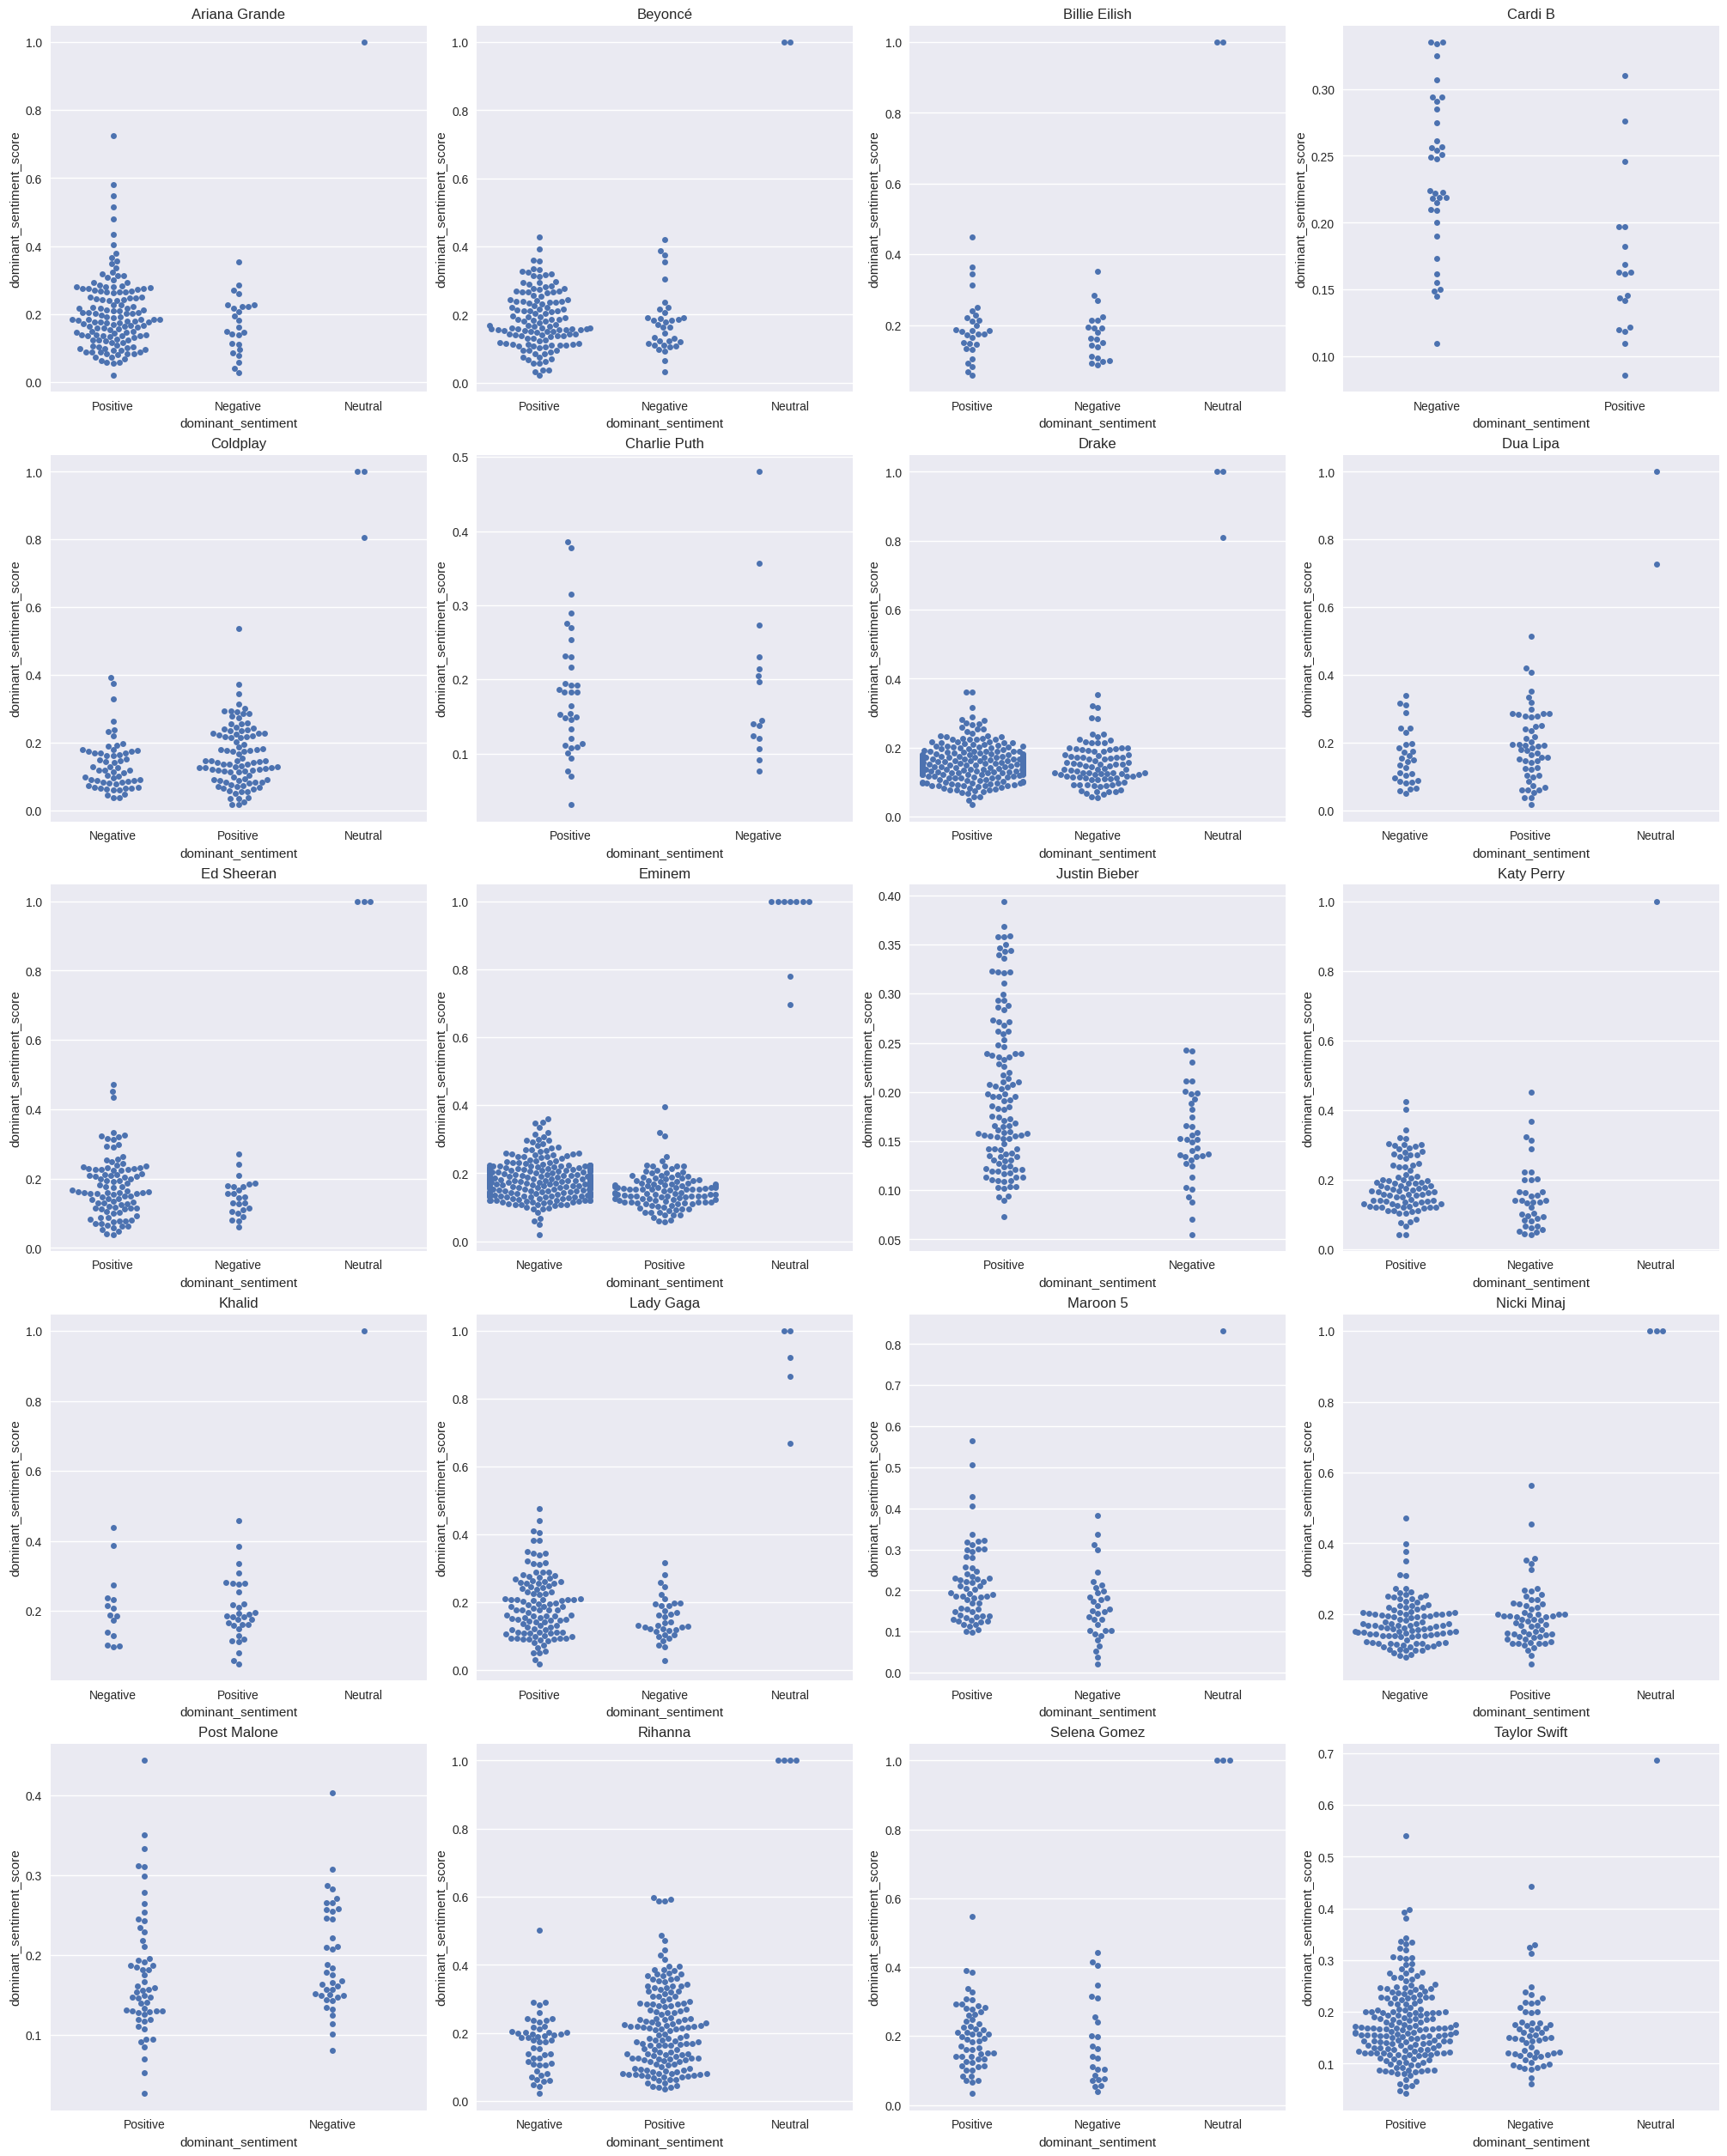

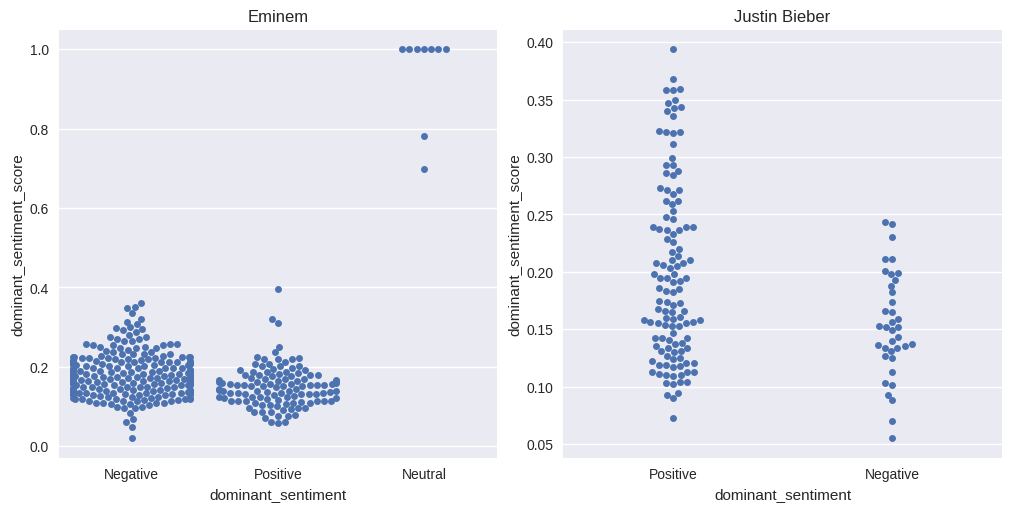

In [ ]:
df_temp=[]
name=df_sentiment['Artist'].unique()
name=name[0:20]
num_plots = 20
total_cols = 4
total_rows = 5
#fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(5*total_cols, 5*total_rows), constrained_layout=True)
for artist in df_main['Artist'].unique():
    df_temp.append(df_sentiment[df_sentiment['Artist']==artist])
for i, var in enumerate(name):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.swarmplot(data=df_temp[i], x="dominant_sentiment", y="dominant_sentiment_score",ax=axs[row][pos])
    axs[row][pos].set_title(name[i])

name=df_main['Artist'].unique()
name=name[9:11]
fig, axs = plt.subplots(nrows=1, ncols=2,
                        figsize=(10, 5), constrained_layout=True)
plot = sns.swarmplot(data=df_temp[9], x="dominant_sentiment", y="dominant_sentiment_score",ax=axs[0])
axs[0].set_title(name[0])
plot = sns.swarmplot(data=df_temp[10], x="dominant_sentiment", y="dominant_sentiment_score",ax=axs[1])
axs[1].set_title(name[1])

In [ ]:
df_sentiment.dtypes

Artist                       object
Title                        object
Album                        object
Date                         object
Lyric                        object
Year                          int64
words                        object
negative                    float64
neutral                     float64
positive                    float64
dominant_sentiment           object
dominant_sentiment_score    float64
dtype: object

In [ ]:
df_new = df_sentiment[['Artist','Year','negative','neutral','positive','dominant_sentiment_score']]


In [ ]:
mean_df = df_new.groupby('Artist').mean()

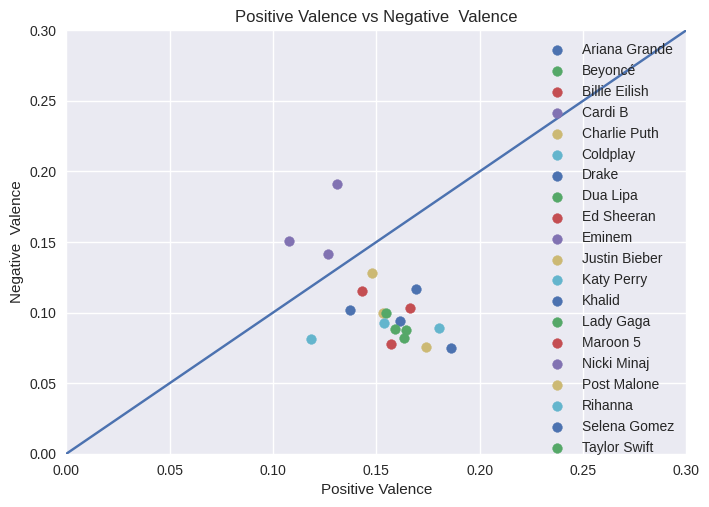

In [ ]:
x = np.linspace(0, 10, 1000)
for name, group in mean_df.groupby('Artist'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend()
plt.xlim([0,0.3])
plt.ylim([0,0.3])
plt.plot(x, x+0, linestyle='solid')
plt.title("Positive Valence vs Negative  Valence")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()#positive and negative region

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
user_input = "film"

In [ ]:
corpus = []
for index, row in df_sentiment.iterrows():
    corpus.append(row["Lyric"])
corpus.append(user_input)

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

In [ ]:
similarity_scores = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])

In [ ]:
combined_scores = [(similarity_scores[0][i] * (float(df_sentiment.at[i, 'positive']) - float(df_sentiment.at[i, 'negative'])), df_sentiment.at[i, 'Title'])
                   for i in range(len(df_sentiment))]


In [ ]:
sorted_songs = sorted(combined_scores, key=lambda x: x[0], reverse=True)

In [ ]:
top_n = 3
recommended_songs = sorted_songs[:top_n]

In [ ]:
recommended_songs

[(0.045039368364999166, 'Encore for the Fans'),
 (0.008910066289864224, 'The Fame'),
 (0.007394261482392386, 'Video Phone')]

In [ ]:
for score, song_title in recommended_songs:
    print("- {} (Combined Score: {:.2f})".format(song_title, score))

- Encore for the Fans (Combined Score: 0.05)
- The Fame (Combined Score: 0.01)
- Video Phone (Combined Score: 0.01)
